# 87651260 Applications of Geographic Information System

# Basic Pandas & Plot
## Reference : Basic Pandas for Data science โดย ดร.อรรถพล ธำรงรัตนฤทธิ์ ภาควิชาภาษาศาสตร์ คณะอักษรศาสตร์ จุฬาลงกรณ์มหาวิทยาลัย

## Attawut Nardkulpat, Reseach Officer, Burapha University
### attawut@buu.ac.th
### 08/08/2020

# Importing Data

In [67]:
import pandas as pd

In [68]:
customer = pd.read_excel('spending.xlsx', sheet_name=0)

In [69]:
spending = pd.read_excel('spending.xlsx', sheet_name=1)

In [70]:
spending.head()

,Customer ID,Spending,Card type,Region
0,14,12707,Diamond,ใช้ VLOOKUP ในการเติม
1,6,12926,Primo,NaN
2,12,8373,Diamond,NaN
3,6,15888,Primo,NaN
4,5,19970,Super,NaN


In [71]:
spending.sample(4)

,Customer ID,Spending,Card type,Region
66,18,9803,Super,NaN
133,12,13041,Diamond,NaN
90,15,12652,Primo,NaN
108,20,16814,Primo,NaN


In [72]:
customer.sample(5)

,Customer ID,Region,Age
6,7,Bangkok,36
11,12,South,37
2,3,South,40
8,9,Northeast,41
9,10,Bangkok,43


In [73]:
spending.columns

Index(['Customer ID', 'Spending', 'Card type', 'Region'], dtype='object')

# Basic Analysis

* Numerical value
  * Mean, Median
  * Stdev, range

* Categorical value
  * Distribution
  * Majority



In [74]:
spending.Spending.mean()

14577.82

In [75]:
spending.Spending.median()

14188.5

In [76]:
spending['Spending'].describe()

count      200.000000
mean     14577.820000
std       4233.144685
min       3655.000000
25%      11798.750000
50%      14188.500000
75%      17926.750000
max      27455.000000
Name: Spending, dtype: float64

In [77]:
spending['Card type'].describe()

count       200
unique        4
top       Primo
freq         76
Name: Card type, dtype: object

In [78]:
spending['Card type'].value_counts()

Primo      76
Super      64
Diamond    57
Daimond     3
Name: Card type, dtype: int64

In [79]:
spending['Card type'].value_counts(normalize=True)

Primo      0.380
Super      0.320
Diamond    0.285
Daimond    0.015
Name: Card type, dtype: float64

# Exploring Data

* ตรวจสอบค่าของแต่ละ Column ด้วยสถิติ

* แก้ไขค่าที่ไม่ถูกต้อง
* กำจัด row ที่ไม่ต้องการออกไป
  * Drop
  * Filter with boolean masking
* การสร้าง Column ใหม่
  * Recoding numerical values

In [80]:
spending['Card type'] == 'Daimond'

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: Card type, Length: 200, dtype: bool

In [81]:
condition = spending['Card type'] == 'Daimond'
spending[condition]

,Customer ID,Spending,Card type,Region
69,13,14948,Daimond,NaN
85,5,13573,Daimond,NaN
150,7,12847,Daimond,NaN


In [82]:
spending['Card type'].replace('Daimond', 'Diamond').value_counts()

Primo      76
Super      64
Diamond    60
Name: Card type, dtype: int64

In [83]:
spending['Card type'] = spending['Card type'].replace('Daimond', 'Diamond')

In [84]:
spending2 = spending.drop('Region', axis=1)

In [85]:
spending2.head()

,Customer ID,Spending,Card type
0,14,12707,Diamond
1,6,12926,Primo
2,12,8373,Diamond
3,6,15888,Primo
4,5,19970,Super


In [86]:
spending.head()

,Customer ID,Spending,Card type,Region
0,14,12707,Diamond,ใช้ VLOOKUP ในการเติม
1,6,12926,Primo,NaN
2,12,8373,Diamond,NaN
3,6,15888,Primo,NaN
4,5,19970,Super,NaN


In [87]:
spending.drop('Region', axis=1, inplace=True)

In [88]:
spending.head()

,Customer ID,Spending,Card type
0,14,12707,Diamond
1,6,12926,Primo
2,12,8373,Diamond
3,6,15888,Primo
4,5,19970,Super


# Merging Dataframes

In [89]:
customer.head()

,Customer ID,Region,Age
0,1,Northeast,36
1,2,South,44
2,3,South,40
3,4,Central,54
4,5,Bangkok,46


In [90]:
customer.Region.value_counts()

South        5
Bangkok      5
Northeast    4
Central      3
East         2
North        1
Name: Region, dtype: int64

In [91]:
customer.Age.describe()

count    20.000000
mean     37.550000
std       7.996545
min      23.000000
25%      30.000000
50%      38.000000
75%      43.250000
max      54.000000
Name: Age, dtype: float64

In [92]:
customer_spending = spending.merge(customer, on='Customer ID')

In [93]:
customer_spending.head()

,Customer ID,Spending,Card type,Region,Age
0,14,12707,Diamond,Bangkok,29
1,14,16227,Super,Bangkok,29
2,14,17151,Primo,Bangkok,29
3,14,13409,Super,Bangkok,29
4,14,19091,Primo,Bangkok,29


In [94]:
customer_spending.groupby(['Region', 'Card type']).mean()['Spending']

Region     Card type
Bangkok    Diamond      14701.266667
           Primo        14942.750000
           Super        14822.368421
Central    Diamond      13462.600000
           Primo        14673.083333
           Super        13882.083333
East       Diamond      14084.625000
           Primo        14751.428571
           Super        13359.142857
North      Diamond      16522.000000
           Primo        14800.200000
           Super        20106.000000
Northeast  Diamond      15891.454545
           Primo        13446.785714
           Super        14356.916667
South      Diamond      14693.117647
           Primo        14719.409091
           Super        14243.750000
Name: Spending, dtype: float64

In [95]:
customer_spending.groupby(['Card type']).mean()['Spending']

Card type
Diamond    14824.813559
Primo      14532.947368
Super      14365.682540
Name: Spending, dtype: float64

# Basic plotting

In [96]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 12

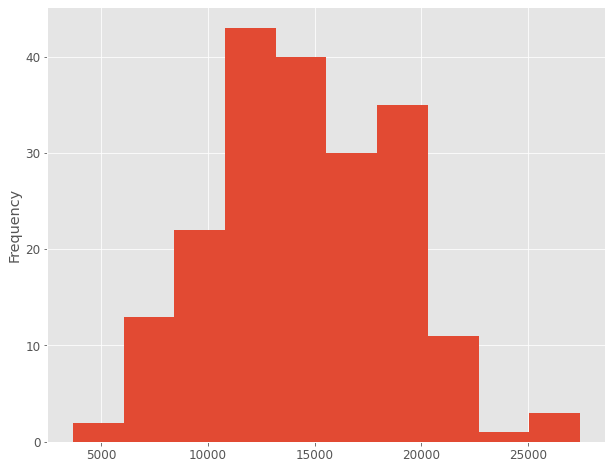

In [97]:
spending.Spending.plot(kind='hist');

<AxesSubplot:xlabel='Region'>

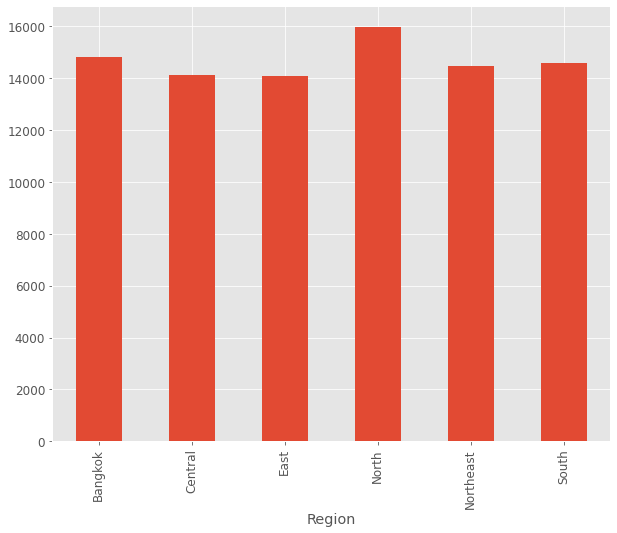

In [98]:
customer_spending.groupby(['Region']).mean()['Spending'].plot(kind='bar')

<AxesSubplot:xlabel='Region'>

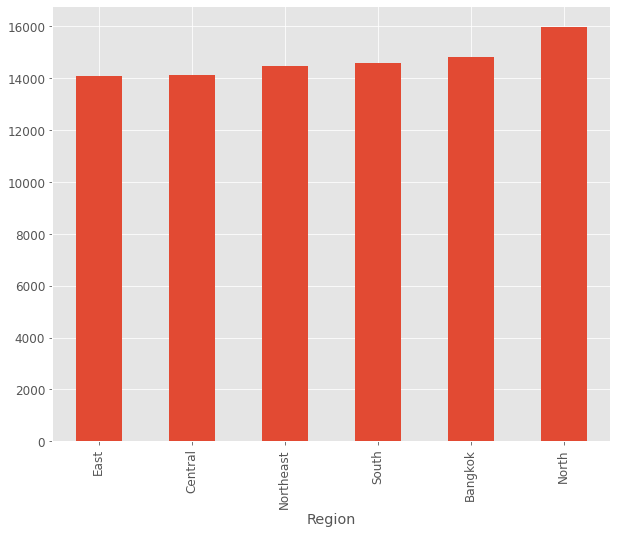

In [99]:
customer_spending.groupby(['Region']).mean()['Spending'].sort_values().plot(kind='bar')